<a href="https://colab.research.google.com/github/sabeesh90/EVA6_master/blob/main/Gradcam_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Navigation inside root directory

In [1]:
  !pip install albumentations==0.4.6

In [2]:
import torchvision

from IPython.display import clear_output
import shutil
import  os
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import cv2
os.chdir('/content/')
shutil.rmtree('EVA6_master')
import warnings
warnings.filterwarnings('ignore')
import pickle
# os.chdir('/content/')

##### Cloning the repository

In [3]:
!git clone https://github.com/sabeesh90/EVA6_master.git


Cloning into 'EVA6_master'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 263 (delta 117), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (263/263), 105.45 KiB | 7.03 MiB/s, done.
Resolving deltas: 100% (117/117), done.


##### navgiating to models folder and loading requisite libraries

In [4]:

%cd EVA6_master/"main and utils"
import main2
from main2 import *
import models
from models import *
import resnet_cam
from resnet_cam import *
import show_cam_bharath_manu_dinesh_sab
from show_cam_bharath_manu_dinesh_sab import *
resnet = ResNet18()

/content/EVA6_master/main and utils


##### Generating train and test dataset

In [5]:
trainloader, testloader = generate_dataset()

Files already downloaded and verified
Files already downloaded and verified


In [6]:
testloader.dataset.class_to_idx
class_dictionary = {}
for key,value in testloader.dataset.class_to_idx.items():
    class_dictionary[value] = key
class_dictionary

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

##### Loading the resnet model

In [7]:
my_model = generate_model(resnet)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

##### Importing training algorithms

In [8]:
import train_test
from train_test import *
optimizer, scheduler =  create_optim(my_model,trainloader)

##### Training the model

In [9]:
epochs = 40
device = 'cuda'
for epoch in range(epochs):
    print("EPOCH:", epoch)
    train(my_model,trainloader, optimizer,device,scheduler)
    test(my_model, testloader,device)


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0
391


Loss=1.8999541997909546 Batch_id=390 Accuracy=20.57: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.7324, Accuracy: 3593/10000 (35.93%)

EPOCH: 1
391


Loss=1.9578754901885986 Batch_id=390 Accuracy=37.50: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6388, Accuracy: 3952/10000 (39.52%)

EPOCH: 2
391


Loss=1.393236756324768 Batch_id=390 Accuracy=46.23: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2890, Accuracy: 5218/10000 (52.18%)

EPOCH: 3
391


Loss=1.2050502300262451 Batch_id=390 Accuracy=51.61: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2088, Accuracy: 5707/10000 (57.07%)

EPOCH: 4
391


Loss=1.0827590227127075 Batch_id=390 Accuracy=57.84: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1624, Accuracy: 5847/10000 (58.47%)

EPOCH: 5
391


Loss=1.1739349365234375 Batch_id=390 Accuracy=62.33: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0455, Accuracy: 6296/10000 (62.96%)

EPOCH: 6
391


Loss=0.9218112230300903 Batch_id=390 Accuracy=65.96: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8806, Accuracy: 6853/10000 (68.53%)

EPOCH: 7
391


Loss=0.9616129994392395 Batch_id=390 Accuracy=68.83: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8681, Accuracy: 7011/10000 (70.11%)

EPOCH: 8
391


Loss=0.9977356195449829 Batch_id=390 Accuracy=71.64: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7443, Accuracy: 7409/10000 (74.09%)

EPOCH: 9
391


Loss=0.6182558536529541 Batch_id=390 Accuracy=74.01: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7001, Accuracy: 7528/10000 (75.28%)

EPOCH: 10
391


Loss=0.6829553842544556 Batch_id=390 Accuracy=76.52: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6433, Accuracy: 7797/10000 (77.97%)

EPOCH: 11
391


Loss=0.5804436206817627 Batch_id=390 Accuracy=78.79: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6859, Accuracy: 7699/10000 (76.99%)

EPOCH: 12
391


Loss=0.6250651478767395 Batch_id=390 Accuracy=80.62: 100%|██████████| 391/391 [00:30<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6498, Accuracy: 7806/10000 (78.06%)

EPOCH: 13
391


Loss=0.6974876523017883 Batch_id=390 Accuracy=81.87: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7418, Accuracy: 7513/10000 (75.13%)

EPOCH: 14
391


Loss=0.7653018832206726 Batch_id=390 Accuracy=83.98: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5973, Accuracy: 7975/10000 (79.75%)

EPOCH: 15
391


Loss=0.4871985912322998 Batch_id=390 Accuracy=85.08: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5912, Accuracy: 8057/10000 (80.57%)

EPOCH: 16
391


Loss=0.4712536334991455 Batch_id=390 Accuracy=86.76: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6024, Accuracy: 8103/10000 (81.03%)

EPOCH: 17
391


Loss=0.31455326080322266 Batch_id=390 Accuracy=88.28: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6342, Accuracy: 8029/10000 (80.29%)

EPOCH: 18
391


Loss=0.15484066307544708 Batch_id=390 Accuracy=89.31: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6422, Accuracy: 8028/10000 (80.28%)

EPOCH: 19
391


Loss=0.31125664710998535 Batch_id=390 Accuracy=90.06: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5987, Accuracy: 8187/10000 (81.87%)

EPOCH: 20
391


Loss=0.24608168005943298 Batch_id=390 Accuracy=91.35: 100%|██████████| 391/391 [00:30<00:00, 12.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6720, Accuracy: 8026/10000 (80.26%)

EPOCH: 21
391


Loss=0.19912604987621307 Batch_id=390 Accuracy=92.54: 100%|██████████| 391/391 [00:31<00:00, 12.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6377, Accuracy: 8167/10000 (81.67%)

EPOCH: 22
391


Loss=0.2050974816083908 Batch_id=390 Accuracy=92.97: 100%|██████████| 391/391 [00:31<00:00, 12.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6772, Accuracy: 8081/10000 (80.81%)

EPOCH: 23
391


Loss=0.12347735464572906 Batch_id=390 Accuracy=93.86: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6111, Accuracy: 8266/10000 (82.66%)

EPOCH: 24
391


Loss=0.13842570781707764 Batch_id=390 Accuracy=94.73: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7346, Accuracy: 8089/10000 (80.89%)

EPOCH: 25
391


Loss=0.09819594770669937 Batch_id=390 Accuracy=95.50: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6535, Accuracy: 8258/10000 (82.58%)

EPOCH: 26
391


Loss=0.22608669102191925 Batch_id=390 Accuracy=95.59: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6305, Accuracy: 8255/10000 (82.55%)

EPOCH: 27
391


Loss=0.05988240987062454 Batch_id=390 Accuracy=95.74: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6565, Accuracy: 8314/10000 (83.14%)

EPOCH: 28
391


Loss=0.039209239184856415 Batch_id=390 Accuracy=95.94: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6735, Accuracy: 8236/10000 (82.36%)

EPOCH: 29
391


Loss=0.09008882939815521 Batch_id=390 Accuracy=96.56: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6777, Accuracy: 8286/10000 (82.86%)

EPOCH: 30
391


Loss=0.2526761591434479 Batch_id=390 Accuracy=96.87: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6768, Accuracy: 8301/10000 (83.01%)

EPOCH: 31
391


Loss=0.1411069929599762 Batch_id=390 Accuracy=96.61: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7035, Accuracy: 8239/10000 (82.39%)

EPOCH: 32
391


Loss=0.11740930378437042 Batch_id=390 Accuracy=97.03: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7463, Accuracy: 8151/10000 (81.51%)

EPOCH: 33
391


Loss=0.03864486142992973 Batch_id=390 Accuracy=97.28: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6984, Accuracy: 8313/10000 (83.13%)

EPOCH: 34
391


Loss=0.0324980802834034 Batch_id=390 Accuracy=97.34: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6220, Accuracy: 8434/10000 (84.34%)

EPOCH: 35
391


Loss=0.15405239164829254 Batch_id=390 Accuracy=97.75: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6930, Accuracy: 8306/10000 (83.06%)

EPOCH: 36
391


Loss=0.13493111729621887 Batch_id=390 Accuracy=97.63: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7821, Accuracy: 8165/10000 (81.65%)

EPOCH: 37
391


Loss=0.037546414881944656 Batch_id=390 Accuracy=97.77: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7278, Accuracy: 8290/10000 (82.90%)

EPOCH: 38
391


Loss=0.0734327882528305 Batch_id=390 Accuracy=97.72: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6595, Accuracy: 8400/10000 (84.00%)

EPOCH: 39
391


Loss=0.10618362575769424 Batch_id=390 Accuracy=98.18: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]



Test set: Average loss: 0.7033, Accuracy: 8294/10000 (82.94%)



In [10]:
a

NameError: ignored

##### SAving the model

In [11]:
filename = 'finalized_model_40.sav'
pickle.dump(my_model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

##### Generating the cam for the predicted class

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

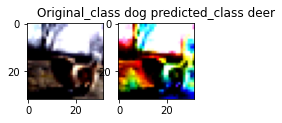

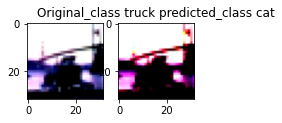

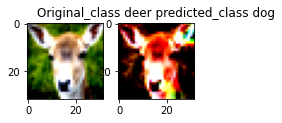

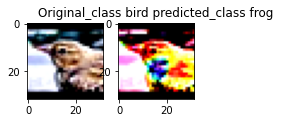

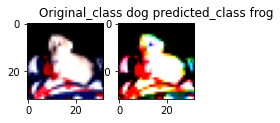

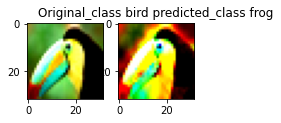

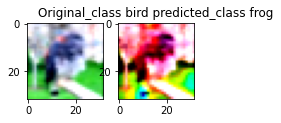

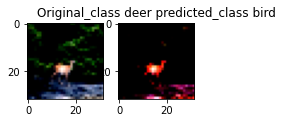

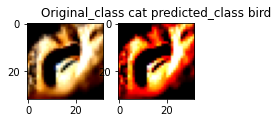

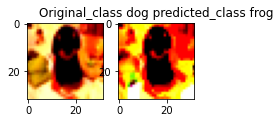

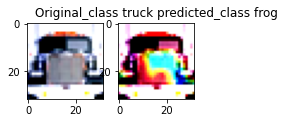

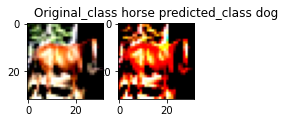

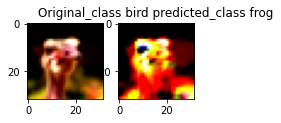

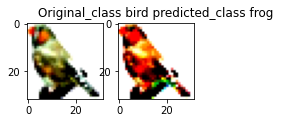

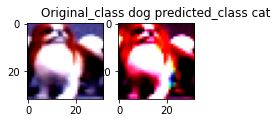

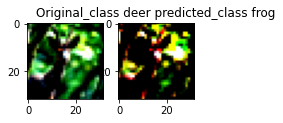

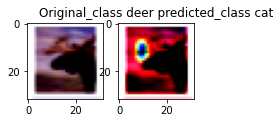

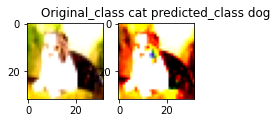

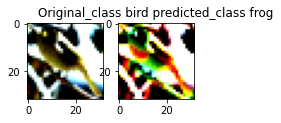

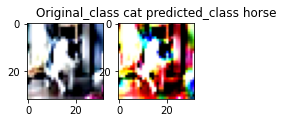

In [13]:
activated_mod = ResNet_Mod(loaded_model)
get_true_pred(testloader,activated_mod,20,class_dictionary)

In [ ]:
trial_mod = ResNet_Mod(loaded_model)
trial_mod.eval()
trial_batch = iter(testloader)

In [ ]:
trial_img, trial_label = next(trial_batch)
trial_img = trial_img.to("cuda")
trial_pred = trial_mod(trial_img)
print(trial_label)
trial_pred

In [ ]:
def generate_gradcam(predicted_class,pred,model, img, true_class_label, predicted_class_label):
    pred[:,predicted_class].backward()
    gradients = model.get_activations_gradient()
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    activations = model.get_activations(img).detach()
    for i in range(256):
        activations[:, i, :, :] *= pooled_gradients[i]
    heatmap = torch.mean(activations, dim=1).squeeze()
    # relu on top of the heatmap
    heatmap = np.maximum(heatmap.cpu(), 0)
    # normalize the heatmap
    heatmap /= torch.max(heatmap)
    # plt.matshow(heatmap)

    heatmap1 = cv2.resize(np.array(heatmap), (32, 32))
    heatmap1 = np.uint8(255 * heatmap1)
    heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
    superimposed_img = heatmap1*0.005  + np.transpose(img[0].cpu().numpy(),(1,2,0))
    a = f'Original_class {true_class_label} predicted_class {predicted_class_label}'
    plt.figure(figsize=(3,2))
    
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(img[0].cpu().numpy(),(1,2,0))/2+0.5)
    plt.subplot(1,2,2)
    plt.imshow(superimposed_img)
    plt.title(a)
      


In [ ]:
activated_mod = ResNet_Mod(loaded_model)
def get_true_pred(testloader,activated_mod,count_images):
    passed = 0
    fail = 0
    count = 0
    activated_mod.eval()
    batch = iter(testloader)
    for i in range(len(testloader)):
        
        img, label = next(batch)
        img = img.to("cuda")
        pred = activated_mod(img)
        predicted_class = np.argmax(np.array(pred.detach().cpu()))
        if int(label.item()) == int(predicted_class):
            # print(f'true_class={label.item()}',f'predicted_class={predicted_class}', True)
            passed+=1
        else:
            count+=1
            true_class_label = class_dictionary[int(label.item())]
            predicted_class_label = class_dictionary[int(predicted_class)]
            # print(f'true_class={label.item()}',f'predicted_class={predicted_class}', False)
            generate_gradcam(predicted_class, pred,activated_mod, img, true_class_label, predicted_class_label)
            fail+=1
            if count >= count_images:
                break
        # clear_output(wait= True)        
    # print(passed, fail, (passed/(passed+fail))*100)

In [ ]:
get_true_pred(testloader,activated_mod,5)

In [ ]:
6292/10000

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [ ]:
img, label = next(batch)
imshow(torchvision.utils.make_grid(img))

In [ ]:
transposed_image = np.transpose(img[0].cpu(), (1,2,0))
print(transposed_image.shape)
plt.imshow(transposed_image)

In [ ]:
batch = iter(testloader)

In [ ]:

img, label = next(batch)
img = img.to("cuda")
pred = resnet_mod(img)
print(pred, label)

In [ ]:
def generate_gradcam(predicted_class, img):
    pred[:,predicted_class].backward()
    gradients = resnet_mod.get_activations_gradient()
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    activations = resnet_mod.get_activations(img).detach()
    for i in range(256):
        activations[:, i, :, :] *= pooled_gradients[i]
    heatmap = torch.mean(activations, dim=1).squeeze()
    # relu on top of the heatmap
    heatmap = np.maximum(heatmap.cpu(), 0)
    # normalize the heatmap
    heatmap /= torch.max(heatmap)
    # plt.matshow(heatmap)

    heatmap1 = cv2.resize(np.array(heatmap), (32, 32))
    heatmap1 = np.uint8(255 * heatmap1)
    heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
    superimposed_img = heatmap1*0.05  + np.transpose(img[0].cpu().numpy(),(1,2,0))

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(img[0].cpu().numpy(),(1,2,0)))
    plt.subplot(1,2,2)
    plt.imshow(superimposed_img)


In [ ]:
generate_heatmap(5,img)

In [ ]:
pred[:,3].backward()

gradients = resnet_mod.get_activations_gradient()

# pool the gradients across the channels
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = resnet_mod.get_activations(img).detach()

# weight the channels by corresponding gradients
for i in range(256):
    activations[:, i, :, :] *= pooled_gradients[i]
    
# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
heatmap = np.maximum(heatmap.cpu(), 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

plt.matshow(heatmap)

In [ ]:
heatmap

In [ ]:
import cv2
heatmap1 = cv2.resize(np.array(heatmap), (32, 32))
heatmap1 = np.uint8(255 * heatmap1)
heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
superimposed_img = heatmap1*0.005 + np.transpose(img[0].cpu().numpy(),(1,2,0))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(np.transpose(img[0].cpu().numpy(),(1,2,0)))
plt.subplot(1,2,2)
plt.imshow(superimposed_img)

In [ ]:
transposed_image = np.transpose(img[0].cpu(), (1,2,0))
print(transposed_image.shape)
plt.imshow(transposed_image)

In [ ]:
heatmap1 = cv2.resize(np.array(heatmap), (32, 32))
heatmap1 = np.uint8(255 * heatmap1)
heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
superimposed_img = heatmap1*0.05  + np.transpose(img[0].cpu().numpy(),(1,2,0))
plt.imshow(superimposed_img)